In [2]:
import numpy as np
import pyqentangle

In [3]:
from scipy.stats import norm

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
fn1 = lambda x1, x2: np.sqrt(0.7)*norm.pdf(x1/0.5)*norm.pdf(x2/0.3)+np.sqrt(0.3)*norm.pdf((x1-5.)/0.5)*norm.pdf((x2-6.)/0.2)

In [6]:
modes = pyqentangle.continuous_schmidt_decomposition(fn1, nb_x1=200, nb_x2=200, x1_lo=-10., x1_hi=10., x2_lo=-10., x2_hi=10., keep=10)

In [7]:
x = np.linspace(-10., 10., 100)

//anaconda/lib/python2.7/site-packages/pyqentangle/continuous.py:57: ComplexWarning: Casting complex values to real discards the imaginary part
  return numerical_continuous_interpolation_nocheck_cython(xarray, yarray, x)
//anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


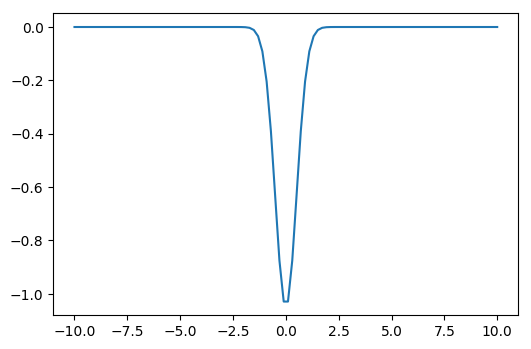

In [8]:
plt.plot(x, modes[0][1](x))

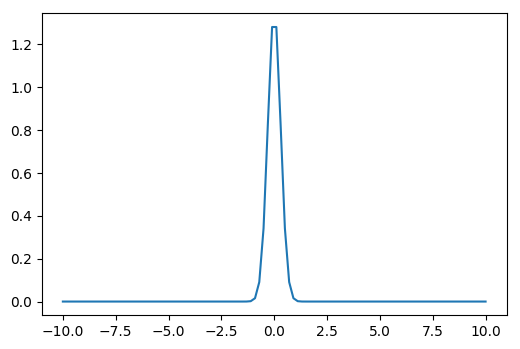

In [9]:
plt.plot(x, modes[0][2](x))

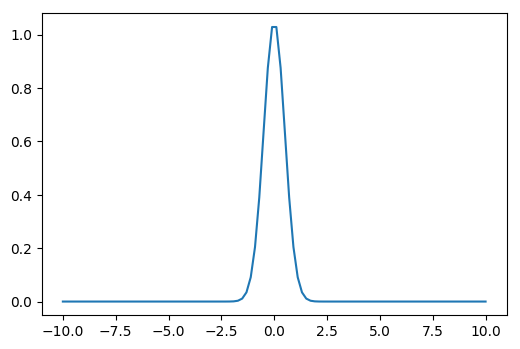

In [10]:
plt.plot(x, modes[1][1](x))

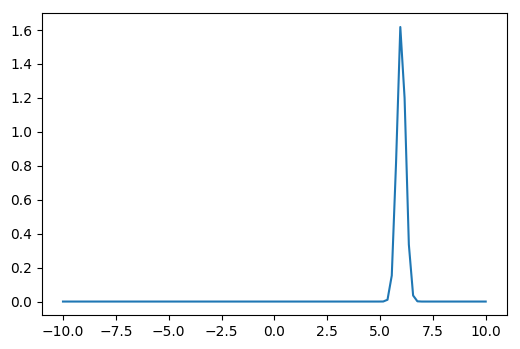

In [11]:
plt.plot(x, modes[1][2](x))

In [12]:
modes[0][0]

0.7777777777777783

In [13]:
modes[1][0]

0.22222222222222182

In [14]:
fn1(6., 6.)

0.011797549146026622

In [15]:
modes[0][2](np.array([0]))

array([1.35225708])

In [16]:
distensor = pyqentangle.continuous.discretize_continuous_bipartitesys(fn1, -10, 10, -10, 10, nb_x1=200, nb_x2=200)

In [17]:
decomposition = pyqentangle.schmidt_decomposition(distensor)

In [18]:
decomposition[0]

(0.8272287058064072,
 array([-4.62895051e-88-5.40172864e-89j, -2.52706608e-86-2.94894603e-87j,
        -1.32496330e-84-1.54615873e-85j, -6.67181958e-83-7.78564360e-84j,
        -3.22654650e-81-3.76520090e-82j, -1.49859664e-79-1.74877920e-80j,
        -6.68474386e-78-7.80072552e-79j, -2.86376897e-76-3.34185964e-77j,
        -1.17826880e-74-1.37497438e-75j, -4.65590350e-73-5.43318128e-74j,
        -1.76691946e-71-2.06189706e-72j, -6.43995342e-70-7.51506865e-71j,
        -2.25424903e-68-2.63058365e-69j, -7.57834282e-67-8.84350597e-68j,
        -2.44680746e-65-2.85528866e-66j, -7.58714762e-64-8.85378068e-65j,
        -2.25949021e-62-2.63669982e-63j, -6.46242604e-61-7.54129295e-62j,
        -1.77514527e-59-2.07149612e-60j, -4.68301343e-58-5.46481706e-59j,
        -1.18650644e-56-1.38458724e-57j, -2.88714094e-55-3.36913343e-56j,
        -6.74712977e-54-7.87352641e-55j, -1.51433978e-52-1.76715058e-53j,
        -3.26423031e-51-3.80917582e-52j, -6.75758388e-50-7.88572578e-51j,
        -1.343554

In [19]:
decomposition[1]

(0.23635105880183002,
 array([4.62894236e-88+5.40242720e-89j, 2.52706163e-86+2.94932739e-87j,
        1.32496097e-84+1.54635868e-85j, 6.67180783e-83+7.78665045e-84j,
        3.22654082e-81+3.76568782e-82j, 1.49859400e-79+1.74900536e-80j,
        6.68473209e-78+7.80173432e-79j, 2.86376393e-76+3.34229181e-77j,
        1.17826673e-74+1.37515219e-75j, 4.65589530e-73+5.43388391e-74j,
        1.76691634e-71+2.06216370e-72j, 6.43994208e-70+7.51604050e-71j,
        2.25424506e-68+2.63092384e-69j, 7.57832948e-67+8.84464962e-68j,
        2.44680315e-65+2.85565791e-66j, 7.58713426e-64+8.85492566e-65j,
        2.25948623e-62+2.63704080e-63j, 6.46241466e-61+7.54226819e-62j,
        1.77514214e-59+2.07176401e-60j, 4.68300518e-58+5.46552378e-59j,
        1.18650435e-56+1.38476629e-57j, 2.88713585e-55+3.36956913e-56j,
        6.74711788e-54+7.87454462e-55j, 1.51433712e-52+1.76737911e-53j,
        3.26422456e-51+3.80966842e-52j, 6.75757198e-50+7.88674557e-51j,
        1.34355213e-48+1.56805638e-49j, 2.

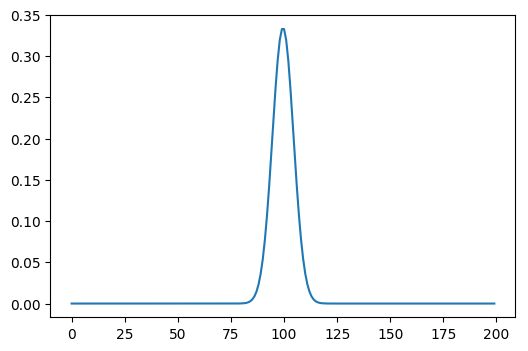

In [20]:
plt.plot(list(range(200)), decomposition[1][1])

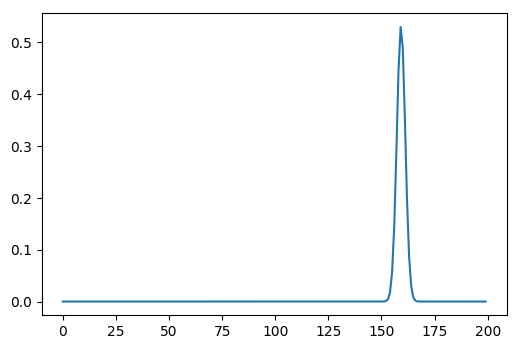

In [21]:
plt.plot(list(range(200)), decomposition[1][2])

In [22]:
rho1 = pyqentangle.schmidt.bipartitepurestate_reduceddensitymatrix(distensor, 1)

In [23]:
rho0 = pyqentangle.schmidt.bipartitepurestate_reduceddensitymatrix(distensor, 0)

In [24]:
vals0, vecs0 = np.linalg.eig(rho0)

In [25]:
vals1, vecs1 = np.linalg.eig(rho1)

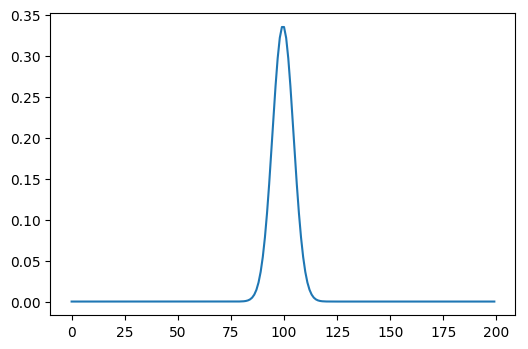

In [26]:
plt.plot(list(range(200)), vecs0[:, 0])

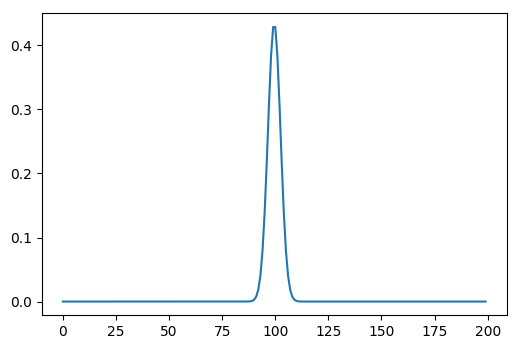

In [27]:
plt.plot(list(range(200)), vecs1[:, 0])

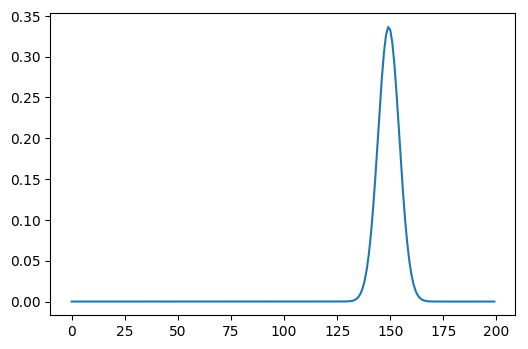

In [28]:
plt.plot(list(range(200)), vecs0[:, 1])

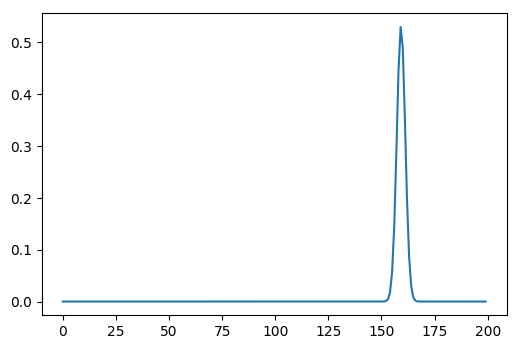

In [29]:
plt.plot(list(range(200)), vecs1[:, 1])

In [30]:
coefmat0 = np.matmul(distensor, np.linalg.inv(vecs1))

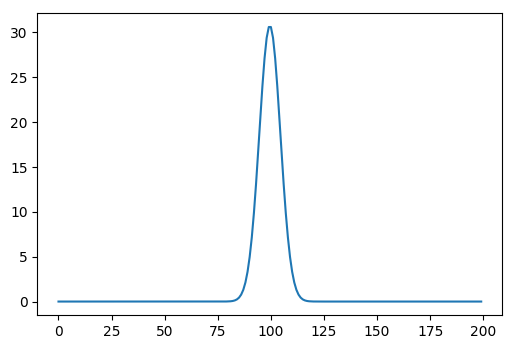

In [31]:
plt.plot(list(range(200)), coefmat0[:, 1])

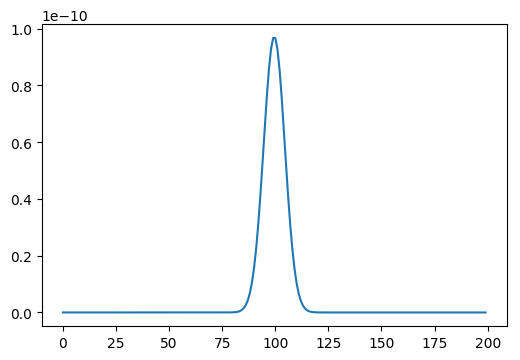

In [32]:
plt.plot(list(range(200)), np.matmul(distensor, np.conj(np.transpose(vecs1)))[:, 1])

In [33]:
np.linalg.norm(np.conj(vecs1)[:, 1])

0.9999999999999999

In [36]:
np.linalg.norm(coefmat0[:, 1])

91.85374159748332

In [41]:
vecs0[140:160, 1]

array([0.05979179+0.00000000e+00j, 0.08514833+0.00000000e+00j,
       0.11645655+1.06910588e-50j, 0.15296951-1.06910588e-50j,
       0.1929741 +0.00000000e+00j, 0.233801  +0.00000000e+00j,
       0.27204886-2.13821177e-50j, 0.30401893+0.00000000e+00j,
       0.32629284-2.13821177e-50j, 0.33633158+0.00000000e+00j,
       0.33295148+4.27642354e-50j, 0.31655373+2.13821177e-50j,
       0.2890461 -2.13821177e-50j, 0.25347784+0.00000000e+00j,
       0.21348436+0.00000000e+00j, 0.1726813 +1.06910588e-50j,
       0.13414601+0.00000000e+00j, 0.10008371+5.34552942e-51j,
       0.07171371+0.00000000e+00j, 0.0493508 +0.00000000e+00j])

In [54]:
np.matmul(distensor, np.conj(np.transpose(vecs1)))[150, 1]

(-2.9472692605015755e-14-1.5372854033206025e-15j)

In [51]:
np.matmul(distensor[150, :], vecs1[:, 1])

(0.16186752468413146+0j)